In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [20]:
df.drop("User ID",axis=1,inplace=True)

In [21]:
df["Gender"]=df["Gender"].replace(
    {"Male":0,
     "Female":1
    }
)

In [22]:
df.head(4)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0


In [23]:
df["Gender"].value_counts()

Gender
1    204
0    196
Name: count, dtype: int64

In [24]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

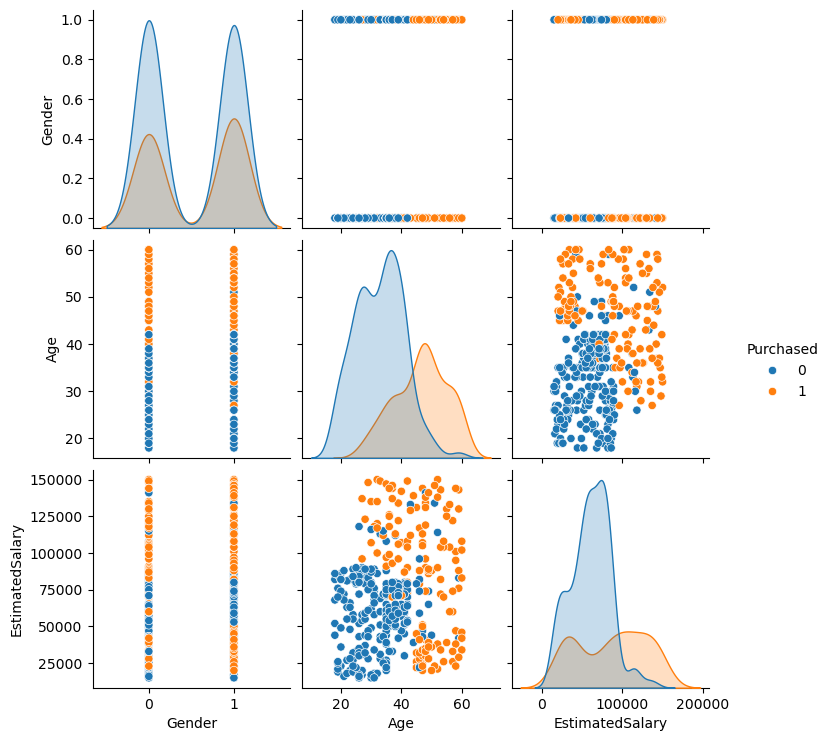

In [35]:
sns.pairplot(df,hue="Purchased")

In [37]:
features=df.drop(["Gender","Purchased"],axis=1)
target=df["Purchased"]

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    print(f"Training Score : {train_score}")
    print(f"Testing Score : {test_score}")
    print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
    print(f"Classification Report : \n{classification_report(ytest,ypred)}")
    return model

In [59]:
mymodel(KNeighborsClassifier(n_neighbors=3))

Training Score : 0.9125
Testing Score : 0.7625
Confusion Matrix : 
[[39  9]
 [10 22]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        48
           1       0.71      0.69      0.70        32

    accuracy                           0.76        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.76      0.76      0.76        80



KNeighborsClassifier(n_neighbors=3)

In [83]:
# hyperparameter tuning of number of neighbors
trainac=[]
testac=[]
for i in range(1,51):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    train_s=model.score(xtrain,ytrain)
    test_s=model.score(xtest,ytest)
    trainac.append(train_s)
    testac.append(test_s)   

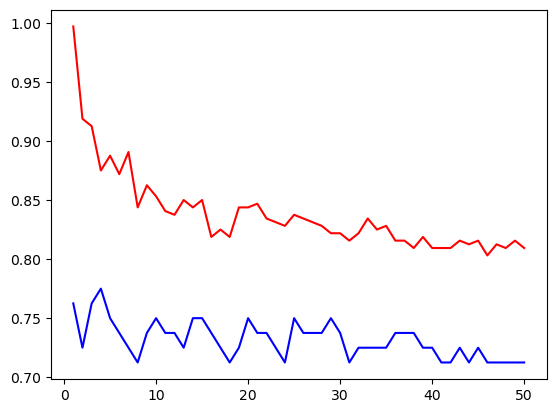

In [84]:
plt.plot(range(1,51),trainac,color="red")
plt.plot(range(1,51),testac,color="blue")
plt.show()

In [87]:
mymodel(KNeighborsClassifier(n_neighbors=15))

Training Score : 0.85
Testing Score : 0.75
Confusion Matrix : 
[[40  8]
 [12 20]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        48
           1       0.71      0.62      0.67        32

    accuracy                           0.75        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.75      0.75      0.75        80



KNeighborsClassifier(n_neighbors=15)